In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib as mpl
#import BiGLasso_Methods as bg
import GmGM
import scipy.stats as stats
import scipy.sparse as sparse
import igraph as ig
from strong_product_model import strong_product_model
import pandas as pd

import os

# Prevent type 3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Preprocessing

In [2]:
# Use pandas to read the csv `data/E-MTAB-2805/{STAGE}_singlecells_counts.txt`
_data_g1 = pd.read_csv('data/E-MTAB-2805/G1_singlecells_counts.txt', sep='\t')
_data_s = pd.read_csv('data/E-MTAB-2805/S_singlecells_counts.txt', sep='\t')
_data_g2m = pd.read_csv('data/E-MTAB-2805/G2M_singlecells_counts.txt', sep='\t')

# Remove all rows with NaN values
_data_g1 = _data_g1.dropna()
_data_s = _data_s.dropna()
_data_g2m = _data_g2m.dropna()

_data_g1

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,43,82,5,0,2,87,...,329,0,364,80,774,4,308,13,372,137
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,89,598,10,249,135,36,...,26,1,499,410,935,6,666,1,29,499
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,65,0,0,0,0,0,...,0,0,0,0,0,0,274,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,1,0,0,0,0,391,...,912,0,30,216,2,16,0,645,154,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38288,ENSMUSG00000097931,ENSMUST00000181419,Gm11392,710.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38289,ENSMUSG00000097932,ENSMUST00000181148,AC160109.2,1033.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38290,ENSMUSG00000097933,ENSMUST00000180397,AC154675.1,522.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38291,ENSMUSG00000097934,ENSMUST00000181654,AC156980.1,1120.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# ALLCAPS Associated Gene Names
_data_g1['AssociatedGeneName'] = _data_g1['AssociatedGeneName'].str.upper()
_data_s['AssociatedGeneName'] = _data_s['AssociatedGeneName'].str.upper()
_data_g2m['AssociatedGeneName'] = _data_g2m['AssociatedGeneName'].str.upper()

_data_g1

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,GNAI3,3262.0,43,82,5,0,2,87,...,329,0,364,80,774,4,308,13,372,137
1,ENSMUSG00000000003,ENSMUST00000000003,PBSN,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,CDC45,2143.0,89,598,10,249,135,36,...,26,1,499,410,935,6,666,1,29,499
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,65,0,0,0,0,0,...,0,0,0,0,0,0,274,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,SCML2,4847.0,1,0,0,0,0,391,...,912,0,30,216,2,16,0,645,154,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38288,ENSMUSG00000097931,ENSMUST00000181419,GM11392,710.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38289,ENSMUSG00000097932,ENSMUST00000181148,AC160109.2,1033.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38290,ENSMUSG00000097933,ENSMUST00000180397,AC154675.1,522.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38291,ENSMUSG00000097934,ENSMUST00000181654,AC156980.1,1120.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Verify that the rows (genes) for all dataframes are in the same order
assert (_data_g1['AssociatedGeneName'] == _data_s['AssociatedGeneName']).all(), \
    "Not the same order!"
assert (_data_g1['AssociatedGeneName'] == _data_g2m['AssociatedGeneName']).all(), \
    "Not the same order!"

print("If this cell did not throw an error, the rows (genes) for all dataframes are in the same order.")

If this cell did not throw an error, the rows (genes) for all dataframes are in the same order.


In [5]:
# Check that gene names are distinct (if not, we should work with Transcript IDs or merge them)
_data_g1['AssociatedGeneName'].value_counts()

U6               954
SNORA17          614
7SK              335
U1               210
5S_RRNA          208
                ... 
GPATCH2            1
RPL39L             1
METRNL             1
DAGLB              1
RP23-429I18.1      1
Name: AssociatedGeneName, Length: 34423, dtype: int64

In [6]:
# Verify that the rows (transcript ids) for all dataframes are in the same order
assert (_data_g1['EnsemblTranscriptID'] == _data_s['EnsemblTranscriptID']).all(), \
    "Not the same order!"
assert (_data_g1['EnsemblTranscriptID'] == _data_g2m['EnsemblTranscriptID']).all(), \
    "Not the same order!"

print("If this cell did not throw an error, the transcripts for all dataframes are in the same order.")

If this cell did not throw an error, the transcripts for all dataframes are in the same order.


In [7]:
# Load mythosis-related genes
mitosis_genes = pd.read_csv('data/E-MTAB-2805/Nmythosis.txt')
mitosis_genes

,EnsemblGeneID
0,ENSMUSG00000035439
1,ENSMUSG00000026426
2,ENSMUSG00000030105
3,ENSMUSG00000026491
4,ENSMUSG00000061665
...,...
162,ENSMUSG00000031010
163,ENSMUSG00000001403
164,ENSMUSG00000078762
165,ENSMUSG00000046010


In [8]:
# Load intrinsic/extrinsic genes
intrinsic_genes = pd.read_csv('data/E-MTAB-2805/intrinsic-apoptotic-0097193.txt', header=None)
extrinsic_genes = pd.read_csv('data/E-MTAB-2805/extrinsic-apoptotic-0097191.txt', header=None)
intrinsic_genes

,0
0,BRCA1
1,SFN
2,HRAS
3,ERCC2
4,RAD9A
...,...
237,CASP9
238,CASP9
239,CASP9
240,CASP9


In [71]:
# Keep only the genes in mitosis_genes
amnt = 1000
data_g1 = _data_g1[
    False
    | _data_g1['EnsemblGeneID'].isin(mitosis_genes['EnsemblGeneID'])
    #| _data_g1['AssociatedGeneName'].isin(intrinsic_genes[0][:amnt])
    #| _data_g1['AssociatedGeneName'].isin(extrinsic_genes[0][:amnt])
]
data_s = _data_s[
    False
    | _data_s['EnsemblGeneID'].isin(mitosis_genes['EnsemblGeneID'])
    #| _data_s['AssociatedGeneName'].isin(intrinsic_genes[0][:amnt])
    #| _data_s['AssociatedGeneName'].isin(extrinsic_genes[0][:amnt])
]
data_g2m = _data_g2m[
    False
    | _data_g2m['EnsemblGeneID'].isin(mitosis_genes['EnsemblGeneID'])
    #| _data_g2m['AssociatedGeneName'].isin(intrinsic_genes[0][:amnt])
    #| _data_g2m['AssociatedGeneName'].isin(extrinsic_genes[0][:amnt])
]
data_g1

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
128,ENSMUSG00000000743,ENSMUST00000000759,CHMP1A,2140.0,3,503,6,6,2,0,...,137,0,33,77,310,2,1,178,670,151
243,ENSMUSG00000001403,ENSMUST00000001439,UBE2C,2191.0,113,198,208,55,704,342,...,1055,0,109,1142,709,1084,549,502,233,829
327,ENSMUSG00000001833,ENSMUST00000115272,SEP-07,2533.0,513,1721,1477,439,813,689,...,1236,0,1556,1118,1271,430,1220,572,2177,951
369,ENSMUSG00000002055,ENSMUST00000045026,SPAG5,3887.0,1,680,8,1,4,0,...,32,1,0,312,271,1,214,0,0,2563
821,ENSMUSG00000005233,ENSMUST00000126638,SPC25,1869.0,1578,739,558,141,100,182,...,195,0,35,457,339,114,393,140,1296,989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,ENSMUSG00000072980,ENSMUST00000110805,OIP5,1778.0,1,170,141,84,2,90,...,250,0,12,178,102,93,45,0,0,183
21179,ENSMUSG00000074476,ENSMUST00000098942,SPC24,1349.0,306,291,105,2,1679,108,...,1220,0,180,252,1153,943,773,177,1551,1116
23005,ENSMUSG00000078762,ENSMUST00000019697,HAUS5,2187.0,0,1,45,0,0,0,...,0,0,4,7,75,0,4,7,28,0
23392,ENSMUSG00000079555,ENSMUST00000060049,HAUS3,1950.0,41,27,29,1,7,12,...,231,0,159,43,129,91,1037,1377,2,302


In [72]:
test = _data_g1[
    _data_g1['AssociatedGeneName'].isin(extrinsic_genes[0][:amnt])
].iloc[:, 4:]
(test > 0).sum(axis=1)

85       91
90       32
135      96
408      84
451       1
         ..
23236     2
31472    55
32708    84
36816     6
37685    21
Length: 100, dtype: int64

In [73]:
# Save mapping of gene names
mapping = data_g1[['EnsemblTranscriptID', 'AssociatedGeneName']]
mapping.set_index('EnsemblTranscriptID', inplace=True)
mapping

,AssociatedGeneName
EnsemblTranscriptID,
ENSMUST00000000759,CHMP1A
ENSMUST00000001439,UBE2C
ENSMUST00000115272,SEP-07
ENSMUST00000045026,SPAG5
ENSMUST00000126638,SPC25
...,...
ENSMUST00000110805,OIP5
ENSMUST00000098942,SPC24
ENSMUST00000019697,HAUS5


In [74]:
# Drop `EnsemblGeneID`, `AssociatedGeneName`, and `GeneLength` columns
data_g1 = data_g1.drop(columns=['EnsemblGeneID', 'AssociatedGeneName', 'GeneLength'])
data_s = data_s.drop(columns=['EnsemblGeneID', 'AssociatedGeneName', 'GeneLength'])
data_g2m = data_g2m.drop(columns=['EnsemblGeneID', 'AssociatedGeneName', 'GeneLength'])

data_g1

,EnsemblTranscriptID,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
128,ENSMUST00000000759,3,503,6,6,2,0,0,0,222,...,137,0,33,77,310,2,1,178,670,151
243,ENSMUST00000001439,113,198,208,55,704,342,852,1252,1268,...,1055,0,109,1142,709,1084,549,502,233,829
327,ENSMUST00000115272,513,1721,1477,439,813,689,586,899,1340,...,1236,0,1556,1118,1271,430,1220,572,2177,951
369,ENSMUST00000045026,1,680,8,1,4,0,0,431,2,...,32,1,0,312,271,1,214,0,0,2563
821,ENSMUST00000126638,1578,739,558,141,100,182,1703,715,55,...,195,0,35,457,339,114,393,140,1296,989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,ENSMUST00000110805,1,170,141,84,2,90,6,213,23,...,250,0,12,178,102,93,45,0,0,183
21179,ENSMUST00000098942,306,291,105,2,1679,108,450,116,2702,...,1220,0,180,252,1153,943,773,177,1551,1116
23005,ENSMUST00000019697,0,1,45,0,0,0,0,37,0,...,0,0,4,7,75,0,4,7,28,0
23392,ENSMUST00000060049,41,27,29,1,7,12,78,406,409,...,231,0,159,43,129,91,1037,1377,2,302


In [75]:
# Join the dataframes on EnsemblTranscriptID
data = data_g1.merge(data_s, on='EnsemblTranscriptID')
data = data.merge(data_g2m, on='EnsemblTranscriptID')
data

,EnsemblTranscriptID,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,...,G2M_cell87_count,G2M_cell88_count,G2M_cell89_count,G2M_cell90_count,G2M_cell91_count,G2M_cell92_count,G2M_cell93_count,G2M_cell94_count,G2M_cell95_count,G2M_cell96_count
0,ENSMUST00000000759,3,503,6,6,2,0,0,0,222,...,21,384,4,879,998,130,126,195,0,153
1,ENSMUST00000001439,113,198,208,55,704,342,852,1252,1268,...,1655,2381,1125,3159,4706,1486,1203,2553,1302,1190
2,ENSMUST00000115272,513,1721,1477,439,813,689,586,899,1340,...,1403,1350,754,679,411,268,691,192,216,418
3,ENSMUST00000045026,1,680,8,1,4,0,0,431,2,...,1239,148,131,104,102,52,91,460,86,254
4,ENSMUST00000126638,1578,739,558,141,100,182,1703,715,55,...,1105,633,335,833,477,138,329,234,96,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,ENSMUST00000110805,1,170,141,84,2,90,6,213,23,...,672,145,104,404,256,111,78,47,209,40
163,ENSMUST00000098942,306,291,105,2,1679,108,450,116,2702,...,1808,271,503,814,1503,575,248,224,533,647
164,ENSMUST00000019697,0,1,45,0,0,0,0,37,0,...,0,51,22,5,0,7,14,37,3,22
165,ENSMUST00000060049,41,27,29,1,7,12,78,406,409,...,449,179,85,84,271,123,138,119,9,153


In [76]:
# Convert to numpy format
data_array = np.log(data.drop(columns=['EnsemblTranscriptID']).to_numpy().astype(np.float64) + 1)
cell_names = data.columns[1:]
gene_names = data['EnsemblTranscriptID']

data_array, data_array.shape

(array([[1.38629436, 6.22257627, 1.94591015, ..., 5.27811466, 0.        ,
         5.0369526 ],
        [4.73619845, 5.29330482, 5.34233425, ..., 7.84541604, 7.17242458,
         7.08254857],
        [6.24222327, 7.45124168, 7.2984451 , ..., 5.26269019, 5.37989735,
         6.03787092],
        ...,
        [0.        , 0.69314718, 3.8286414 , ..., 3.63758616, 1.38629436,
         3.13549422],
        [3.73766962, 3.33220451, 3.40119738, ..., 4.78749174, 2.30258509,
         5.0369526 ],
        [6.02827852, 6.10479323, 6.09807428, ..., 5.34710753, 7.14755927,
         6.8134446 ]]),
 (167, 288))

In [77]:
# Remove data that is all zeros
data_array = data_array[(data_array > 3).sum(axis=1) > 10, :]
data_array.shape

(166, 288)

In [78]:
# Create cell type labels
labels = np.zeros(data_array.shape[1], dtype='<U2')
labels_numeric = np.zeros(data_array.shape[1], dtype=int)
labels[cell_names.str.startswith('G1')] = 'G1'
labels[cell_names.str.startswith('S')] = 'S'
labels[cell_names.str.startswith('G2M')] = 'G2M'

# igraph's assortativity function requires labellings to be numeric
labels_numeric[cell_names.str.startswith('G1')] = 0
labels_numeric[cell_names.str.startswith('S')] = 1
labels_numeric[cell_names.str.startswith('G2M')] = 2
labels

array(['G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1',
       'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'G1', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', '

# Strong Product

In [175]:
# This result is fairly robust to values of rho
# (for large rho, beta needs to be 0 to avoid
# numerical instability causing early convergence)
results_sp = strong_product_model(
    data_matrix=data_array.T - data_array.T.mean(),
    rho_rows=10e8,
    rho_cols_within_rows=10e8,
    rho_cols_between_rows=10e8,
    verbose=True,
    beta=0,
    tol=1e-5,
)

Iteration 1: 629941.6630965297
Iteration 2: 588467.5357505762
Iteration 3: 578775.622024735
Iteration 4: 576359.0077416119
Iteration 5: 575746.4753142742
Iteration 6: 575590.5692275583
Iteration 7: 575570.7062296342
Iteration 8: 575558.2440349753
Iteration 9: 575556.2892511821
Iteration 10: 575555.8460737095
Iteration 11: 575555.4132161841
Iteration 12: 575555.4123904455
Iteration 13: 575555.4123388391
Iteration 14: 575555.4123130362
Iteration 15: 575555.4123001345
Iteration 16: 575555.4122936837 (converged)


In [176]:
cell_graph_array = results_sp['rows'] + 0
np.fill_diagonal(cell_graph_array, 0)
sp_assortativities = []

for percentage_to_keep in 10**np.linspace(-3, 0, 100):
    cg = cell_graph_array.copy()
    # Keep only the top `percentage_to_keep` edges
    threshold = np.percentile(cg, (1 - percentage_to_keep) * 100)
    cg[abs(cg) < threshold] = 0

    # Convert the cell graph object into an igraph object
    cell_graph = ig.Graph.Weighted_Adjacency(cg + cg.T, mode=ig.ADJ_UNDIRECTED)
    cell_graph.vs['label'] = labels_numeric

    # Calculate assortativity
    sp_assortativities.append(cell_graph.assortativity_nominal('label'))

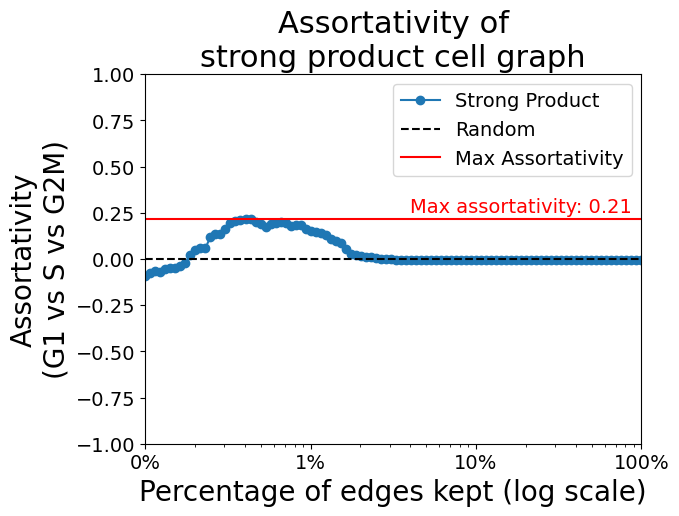

In [177]:
fig, ax = plt.subplots()
ax.plot(10**np.linspace(-3, 0, 100), sp_assortativities, marker='o', label='Strong Product')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(sp_assortativities), color='red', linestyle='-', label='Max Assortativity')
ax.text(
    0.04, max(sp_assortativities) + 0.04,
    f"Max assortativity: {max(sp_assortativities):.2f}",
    color='red',
    size=14
)

ax.legend()
ax.set_title('Assortativity of\nstrong product cell graph')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14})

fig.savefig('out_figs/cell-cycle/sp-assortativity.pdf', bbox_inches='tight')

## Genes

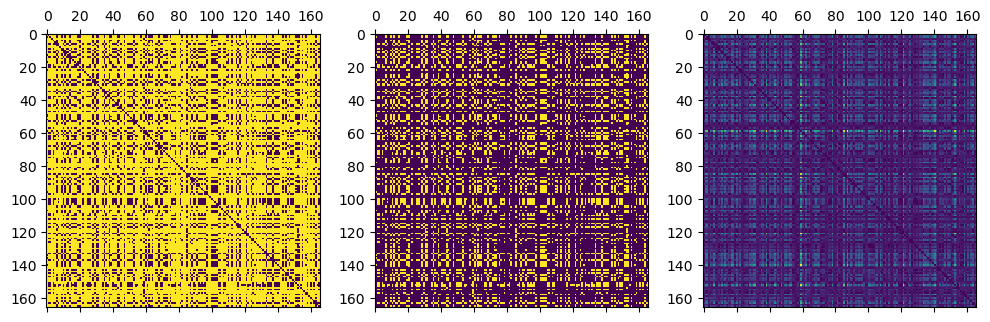

In [178]:
within = results_sp['cols_within_rows'].copy()
between = results_sp['cols_between_rows'].copy()
within = within + within.T
between = between + between.T
np.fill_diagonal(within, 0)
np.fill_diagonal(between, 0)

differences = np.abs(within-between)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.matshow(within > between)
ax2.matshow(between > within)
ax3.matshow(differences)

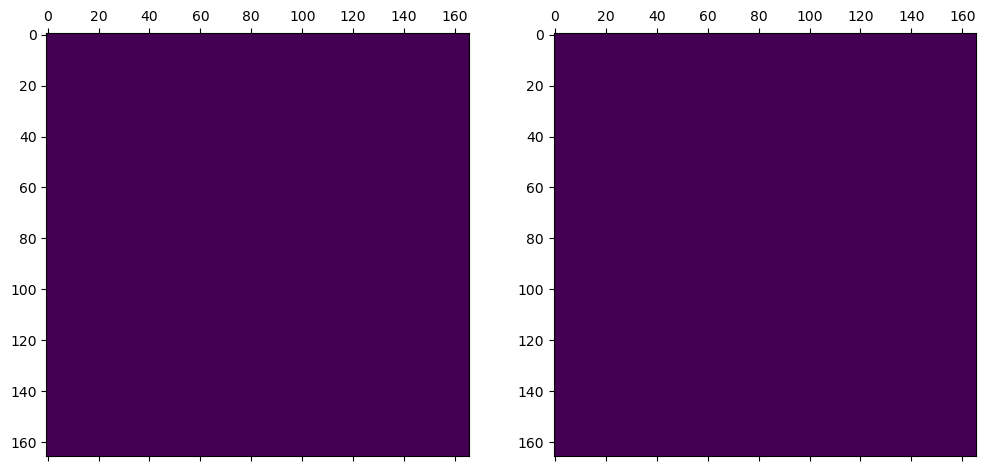

In [179]:
within = results_sp['cols_within_rows'].copy()
between = results_sp['cols_between_rows'].copy()
within = within + within.T
between = between + between.T
np.fill_diagonal(within, 0)
np.fill_diagonal(between, 0)

# Keep K connections per gene
K = 1
num_genes = within.shape[0]
to_keep = num_genes * K
num_edges = (num_genes ** 2 - num_genes) / 2
percentile = 100 - to_keep / num_edges * 100
threshold_within = np.percentile(within, percentile)
threshold_between = np.percentile(between, percentile)

within[abs(within) < threshold_within] = 0
between[abs(between) < threshold_between] = 0
within[within != 0] = 1
between[between != 0] = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.matshow(within > between)
ax2.matshow(between > within)

In [180]:
# Print out all gene pairs that exist within a cell but not between cells
gene_names = data['EnsemblTranscriptID']
intrinsic_amount = 0
extrinsic_amount = 0
gene_pairs = np.argwhere(within - between > 0)
for gene_pair in gene_pairs:
    left = mapping.loc[gene_names[gene_pair[0]]][0]
    right = mapping.loc[gene_names[gene_pair[1]]][0]
    left_str = left
    right_str = right
    if left in intrinsic_genes[0].values:
        left_str += ' [I]'
        intrinsic_amount += 1
    if left in extrinsic_genes[0].values:
        left_str += ' [E]'
        extrinsic_amount += 1
    if right in intrinsic_genes[0].values:
        right_str += ' [I]'
        intrinsic_amount += 1
    if right in extrinsic_genes[0].values:
        right_str += ' [E]'
        extrinsic_amount += 1
    print(f"{left_str} <-> {right_str}")

print(f"Total: {len(gene_pairs)}")
#print(f"Intrinsic: {intrinsic_amount / len(gene_pairs)}")
#print(f"Extrinsic: {extrinsic_amount / len(gene_pairs)}")

Total: 0


In [181]:
# Print out all gene pairs that exist within a cell but not between cells
gene_names = data['EnsemblTranscriptID']
intrinsic_amount = 0
extrinsic_amount = 0
gene_pairs = np.argwhere(within - between < 0)
between_genes = set({})
for gene_pair in gene_pairs:
    left = mapping.loc[gene_names[gene_pair[0]]][0]
    right = mapping.loc[gene_names[gene_pair[1]]][0]
    between_genes.add(left)
    between_genes.add(right)
    left_str = left
    right_str = right
    if left in intrinsic_genes[0].values:
        left_str += ' [I]'
        intrinsic_amount += 1
    if left in extrinsic_genes[0].values:
        left_str += ' [E]'
        extrinsic_amount += 1
    if right in intrinsic_genes[0].values:
        right_str += ' [I]'
        intrinsic_amount += 1
    if right in extrinsic_genes[0].values:
        right_str += ' [E]'
        extrinsic_amount += 1
    print(f"{left_str} <-> {right_str}")

print(f"Total: {len(gene_pairs)}")
#print(f"Intrinsic: {intrinsic_amount / len(gene_pairs)}")
#print(f"Extrinsic: {extrinsic_amount / len(gene_pairs)}")
len(between_genes)

Total: 0


0

# Transposed SP

In [183]:
results_spt = strong_product_model(
    data_matrix=data_array - data_array.mean(),
    rho_rows=10e8,
    rho_cols_within_rows=10e8,
    rho_cols_between_rows=10e8,
    verbose=True,
    tol=1e-3,
    beta=0
)

Iteration 1: 629941.6320795713
Iteration 2: 588467.507147772
Iteration 3: 578775.5948077023
Iteration 4: 576358.9810714296
Iteration 5: 575746.4488357569
Iteration 6: 575590.5428115826
Iteration 7: 575570.6798233938
Iteration 8: 575558.2176350673
Iteration 9: 575556.2628523024
Iteration 10: 575555.8196750643
Iteration 11: 575555.6032463294
Iteration 12: 575555.4962918942
Iteration 13: 575555.4431259925
Iteration 14: 575555.4166204173
Iteration 15: 575555.4033869173
Iteration 16: 575555.4031802944 (converged)


In [184]:
cell_graph_array = results_spt['cols_within_rows'] + 0
np.fill_diagonal(cell_graph_array, 0)
spt_assortativities = []

for percentage_to_keep in 10**np.linspace(-3, 0, 100):
    cg = cell_graph_array.copy()
    # Keep only the top `percentage_to_keep` edges
    threshold = np.percentile(cg, (1 - percentage_to_keep) * 100)
    cg[abs(cg) < threshold] = 0

    # Convert the cell graph object into an igraph object
    cell_graph = ig.Graph.Weighted_Adjacency(cg + cg.T, mode=ig.ADJ_UNDIRECTED)
    cell_graph.vs['label'] = labels_numeric

    # Calculate assortativity
    spt_assortativities.append(cell_graph.assortativity_nominal('label'))

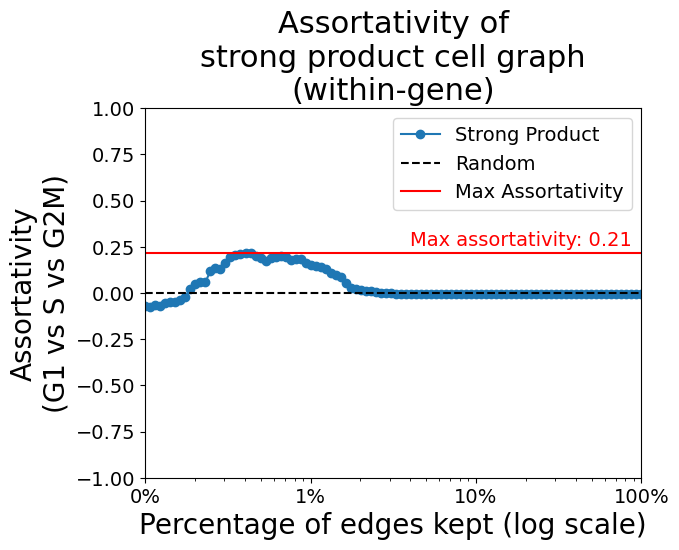

In [185]:
fig, ax = plt.subplots()
ax.plot(10**np.linspace(-3, 0, 100), spt_assortativities, marker='o', label='Strong Product')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(spt_assortativities), color='red', linestyle='-', label='Max Assortativity')
ax.text(
    0.04, max(spt_assortativities) + 0.04,
    f"Max assortativity: {max(spt_assortativities):.2f}",
    color='red',
    size=14
)

ax.legend()
ax.set_title('Assortativity of\nstrong product cell graph\n(within-gene)')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14})

fig.savefig('out_figs/cell-cycle/sp-assortativity-within.pdf', bbox_inches='tight')

In [186]:
cell_graph_array = results_spt['cols_between_rows'] + 0
np.fill_diagonal(cell_graph_array, 0)
spt_assortativities = []

for percentage_to_keep in 10**np.linspace(-3, 0, 100):
    cg = cell_graph_array.copy()
    # Keep only the top `percentage_to_keep` edges
    threshold = np.percentile(cg, (1 - percentage_to_keep) * 100)
    cg[abs(cg) < threshold] = 0

    # Convert the cell graph object into an igraph object
    cell_graph = ig.Graph.Weighted_Adjacency(cg + cg.T, mode=ig.ADJ_UNDIRECTED)
    cell_graph.vs['label'] = labels_numeric

    # Calculate assortativity
    spt_assortativities.append(cell_graph.assortativity_nominal('label'))

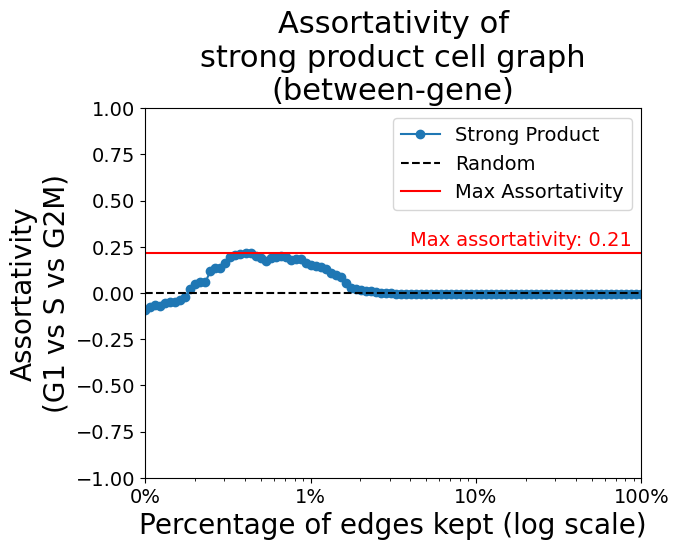

In [187]:
fig, ax = plt.subplots()
ax.plot(10**np.linspace(-3, 0, 100), spt_assortativities, marker='o', label='Strong Product')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(spt_assortativities), color='red', linestyle='-', label='Max Assortativity')
ax.text(
    0.04, max(spt_assortativities) + 0.04,
    f"Max assortativity: {max(spt_assortativities):.2f}",
    color='red',
    size=14
)

ax.legend()
ax.set_title('Assortativity of\nstrong product cell graph\n(between-gene)')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14})

fig.savefig('out_figs/cell-cycle/sp-assortativity-between.pdf', bbox_inches='tight')

In [188]:
cell_graph_array = results_spt['cols_between_rows'] + results_spt['cols_within_rows']
np.fill_diagonal(cell_graph_array, 0)
spt_assortativities = []

for percentage_to_keep in 10**np.linspace(-3, 0, 100):
    cg = cell_graph_array.copy()
    # Keep only the top `percentage_to_keep` edges
    threshold = np.percentile(cg, (1 - percentage_to_keep) * 100)
    cg[abs(cg) < threshold] = 0

    # Convert the cell graph object into an igraph object
    cell_graph = ig.Graph.Weighted_Adjacency(cg + cg.T, mode=ig.ADJ_UNDIRECTED)
    cell_graph.vs['label'] = labels_numeric

    # Calculate assortativity
    spt_assortativities.append(cell_graph.assortativity_nominal('label'))

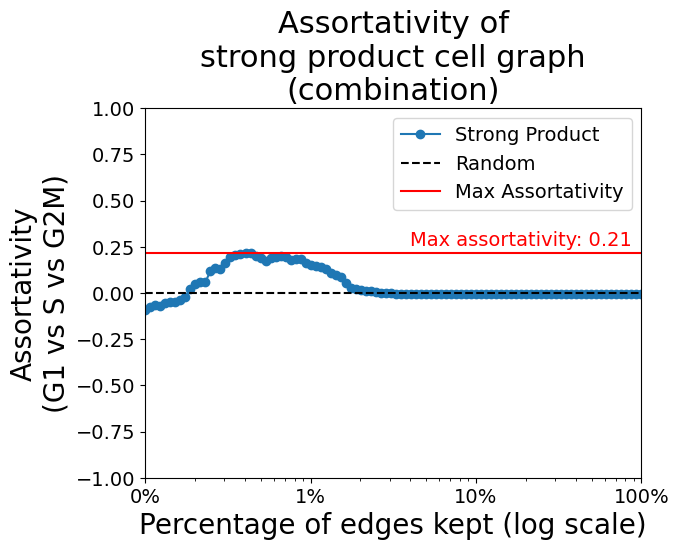

In [189]:
fig, ax = plt.subplots()
ax.plot(10**np.linspace(-3, 0, 100), spt_assortativities, marker='o', label='Strong Product')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(spt_assortativities), color='red', linestyle='-', label='Max Assortativity')
ax.text(
    0.04, max(spt_assortativities) + 0.04,
    f"Max assortativity: {max(spt_assortativities):.2f}",
    color='red',
    size=14
)

ax.legend()
ax.set_title('Assortativity of\nstrong product cell graph\n(combination)')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14})

fig.savefig('out_figs/cell-cycle/sp-assortativity-both.pdf', bbox_inches='tight')

# GmGM

In [190]:
# Warnings for this cell have been cleared as a warning
# printed a filepath revealing the name of one of the author's,
# contradicting anonymity.
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dataset_gmgm = GmGM.Dataset(
        dataset={'data': data_array - data_array.mean()},
        structure={'data': (f'gene', f'cell')},
        batch_axes=None
    )
    results_gmgm = GmGM.GmGM(
        dataset_gmgm,
        to_keep=1.0,
        threshold_method="overall",
        n_comps=None,
        verbose=True,
        centering_method=None,
        use_nonparanormal_skeptic=False,
        nonparanormal_evec_backend="COCA",
        readonly=False,
        calculate_explained_variance=True,
        batch_size=1000
    )
    results_gmgm

Centering...
Calculating eigenvectors...
	by calculating gram matrices and then eigendecomposing...
Calculating eigenvectors for axis='gene'
Calculating eigenvectors for axis='cell'
100% explained variance, since `n_comps` was not specified
Calculating eigenvalues...
@0: -39355.70400519562 (-39359.69794642875 + 3.993941233130703 + 0) ∆inf
Converged! (@13: -46924.247594432774)
Recomposing sparse precisions...
Done!


In [191]:
cell_graph_array = np.abs(results_gmgm.precision_matrices['cell'].toarray())
np.fill_diagonal(cell_graph_array, 0)
gmgm_assortativities = []

for percentage_to_keep in 10**np.linspace(-3, 0, 100):
    cg = cell_graph_array.copy()
    # Keep only the top `percentage_to_keep` edges
    threshold = np.percentile(cg, (1 - percentage_to_keep) * 100)
    cg[abs(cg) < threshold] = 0

    # Convert the cell graph object into an igraph object
    cell_graph = ig.Graph.Weighted_Adjacency(cg, mode=ig.ADJ_UNDIRECTED)
    cell_graph.vs['label'] = labels_numeric

    # Calculate assortativity
    gmgm_assortativities.append(cell_graph.assortativity_nominal('label'))

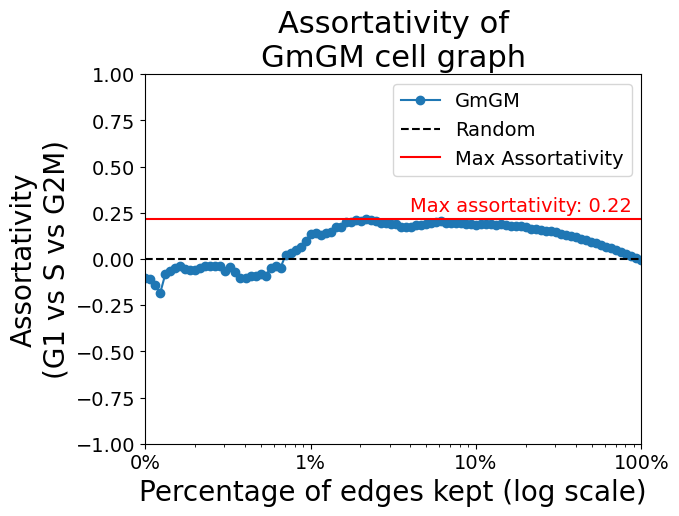

In [192]:
fig, ax = plt.subplots()
ax.plot(10**np.linspace(-3, 0, 100), gmgm_assortativities, marker='o', label='GmGM')
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(gmgm_assortativities), color='red', linestyle='-', label='Max Assortativity')
ax.text(
    0.04, max(gmgm_assortativities) + 0.04,
    f"Max assortativity: {max(gmgm_assortativities):.2f}",
    color='red',
    size=14
)

ax.legend()
ax.set_title('Assortativity of\nGmGM cell graph')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14})

fig.savefig('out_figs/cell-cycle/gmgm-assortativity.pdf', bbox_inches='tight')

# Together

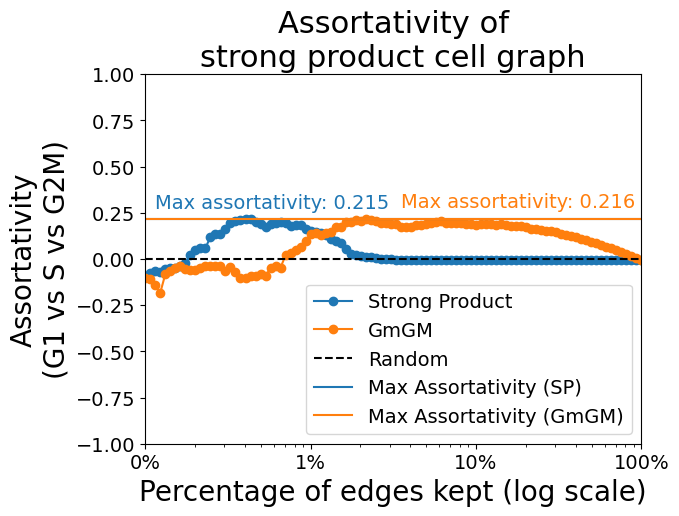

In [193]:
fig, ax = plt.subplots()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color1 = colors[0]
color2 = colors[1]
ax.plot(10**np.linspace(-3, 0, 100), sp_assortativities, marker='o', label='Strong Product', color=color1,)
ax.plot(10**np.linspace(-3, 0, 100), gmgm_assortativities, marker='o', label='GmGM', color=color2)
ax.set_xscale('log')
ax.axhline(0, color='black', linestyle='--', label='Random')
ax.set_xlabel('Percentage of edges kept (log scale)')
ax.set_ylabel('Assortativity\n(G1 vs S vs G2M)')
ax.set_ylim(-1, 1)

# Add a line at the minimum assortativity
ax.axhline(max(sp_assortativities), color=color1, linestyle='-', label='Max Assortativity (SP)')
ax.axhline(max(gmgm_assortativities), color=color2, linestyle='-', label='Max Assortativity (GmGM)')
fig.text(
    0.14, 0.6,
    f"Max assortativity: {max(sp_assortativities):.3f}",
    color=color1,
    size=14
)
ax.text(
    0.035, max(sp_assortativities) + 0.065,
    f"Max assortativity: {max(gmgm_assortativities):.3f}",
    color=color2,
    size=14
)

ax.set_title('Assortativity of\nstrong product cell graph')

# Format x axis with percents
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlim(0.001, 1)

# Increase font size
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

# Of labels
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)

# And title
ax.title.set_fontsize(22)

# And legend
ax.legend(prop={'size': 14}, loc='lower right')

fig.savefig('out_figs/cell-cycle/sp-assortativity-together.pdf', bbox_inches='tight')